<a href="https://colab.research.google.com/github/bsponce1/modelo3/blob/main/SVM_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Extrae el archivo zip del dataset'''
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [2]:
'''Cargar librerias'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img


%matplotlib inline

In [3]:
'''Instalar modulo'''
!pip install split-folders
import splitfolders
'''Para asignar el entrenamiento, prueba y validacion'''
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 4100 files [00:01, 3846.31 files/s]


In [4]:
'''Para preprocesar los datos con keras'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 3420 files belonging to 7 classes.
Found 1410 files belonging to 7 classes.
Found 1460 files belonging to 7 classes.


In [5]:
'''Clases de arroz'''
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag', 'test', 'training']


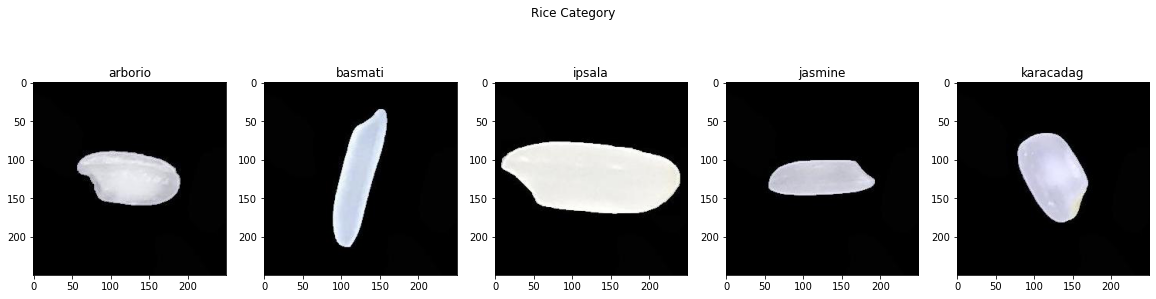

In [7]:
'''Para crear la figura'''
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
'''Para tomar los tipos de datos para predecir'''
arborio_img = img.imread('./dataset/Arborio/Arborio (1).jpg')
basmati_img = img.imread('./dataset//Basmati/Basmati (1).jpg')
ipsala_img = img.imread('./dataset/Ipsala/Ipsala (1).jpg')
jasmine_img = img.imread('./dataset/Jasmine/Jasmine (1).jpg')
karacadag_img = img.imread('./dataset/Karacadag/Karacadag (1).jpg')

'''Poner nombres a las imagenes'''
ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')
'''Ejecutar las imagenes de los tipos de arroz'''
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

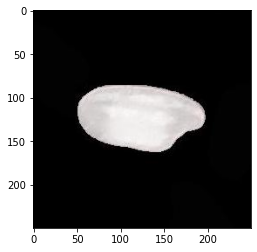

In [8]:
'''Toma una imagen como prediccion'''
data='./dataset'
import cv2
for category in class_names:
    path=os.path.join(data, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [9]:
'''Creacion del entrenamiento de los datos'''
training_data=[]
IMG_SIZE=100
def create_training_data():
    for category in class_names:
        path=os.path.join(data, category)
        class_num=class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 
'''Ver la cantidad de datos'''
print(len(training_data))

4100


In [10]:
'''Para asignar los datos de entrenamiento'''
lenofimage = len(training_data)
'''Creacion de la variable x and y'''
X=[]
y=[]

'''Mostrar las categorias'''
for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
'''Cantidad de datos'''
X.shape
'''Dividir x en numero maximo de pixel'''
X = X/255.0
'''La variable x en position 1'''
X[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
'''Cantidad de datos en y'''
y=np.array(y)
y.shape

(4100,)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
'''Para entrenar el modelo'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.svm import SVC
'''Asignacion del kernel'''
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)
y2 = svc.predict(X_test)

In [14]:
'''Creacion de la predicion'''
y2 = svc.predict(X_test)
'''Acurracy del modelo'''
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))
'''Acurracy de cada imagen'''
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is 0.9912195121951219
Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.99      0.99      0.99       206
           1       0.99      0.98      0.99       201
           2       1.00      1.00      1.00       209
           3       0.98      1.00      0.99       217
           4       0.99      0.99      0.99       192

    accuracy                           0.99      1025
   macro avg       0.99      0.99      0.99      1025
weighted avg       0.99      0.99      0.99      1025



In [15]:
'''Para visualizar los datos'''
import pandas as pd
'''Mostrar el resultado de la prediccion'''
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result.head(20)

,original,predicted
0,1,1
1,4,4
2,1,1
3,2,2
4,1,1
5,3,3
6,3,3
7,2,2
8,1,1
9,2,2


# Kernel Polynomial

In [ ]:
'''Creacion del kernel polynomial'''
poly_param_grid = {
    
        "kernel": ["poly"],
        "degree": [2, 3, 4],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}
from sklearn import svm
from sklearn.model_selection import GridSearchCV
poly_grid = GridSearchCV(svm.SVC(), poly_param_grid)
poly_grid.fit(X_train,y_train)
print(poly_grid.best_estimator_)

In [ ]:
'''Creacion de metricas del modelo'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
poly_pred = poly_grid.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_precision = precision_score(y_test, poly_pred, average='weighted')
poly_recall = recall_score(y_test, poly_pred, average='weighted')
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print('Precision (Polynomial Kernel): ', "%.2f" % (poly_precision*100))
print('Recall (Polynomial Kernel): ', "%.2f" % (poly_recall*100))

In [ ]:
'''Creacion de las imagenes'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y2)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
'''Graficar la matriz'''
plt.show()